# Usage

A simple usage is represented by this notebook

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import Image

In [2]:
from repacker import Gen, SceneDataModel

## Input

Generate a random series of input rectangles. 

- The input is a list of 2-ary tuples
- Each tuple means the (width, height)


For example, we create 100 rectangles here, with default distribution of width/length uniform between [1, 20]

In [3]:
inp = Gen.gen_inp(100, 1, 20, 1, 20)

In [4]:
inp[:5]

[(12, 1), (8, 7), (11, 10), (10, 3), (15, 8)]

Now create a model instance and read the input.

In [5]:
s = SceneDataModel()
s.read_input(inp)

Alternatively, `Gen.from_file` is used to read a file and get the tuples.

# Solve

Sorting the rectangles (default by their area) is a very advantageous heuristics.
- The total bounding area and the fill rate is shown in the figure
- The fill rate is the sum of rectangle area divided by the bounding area

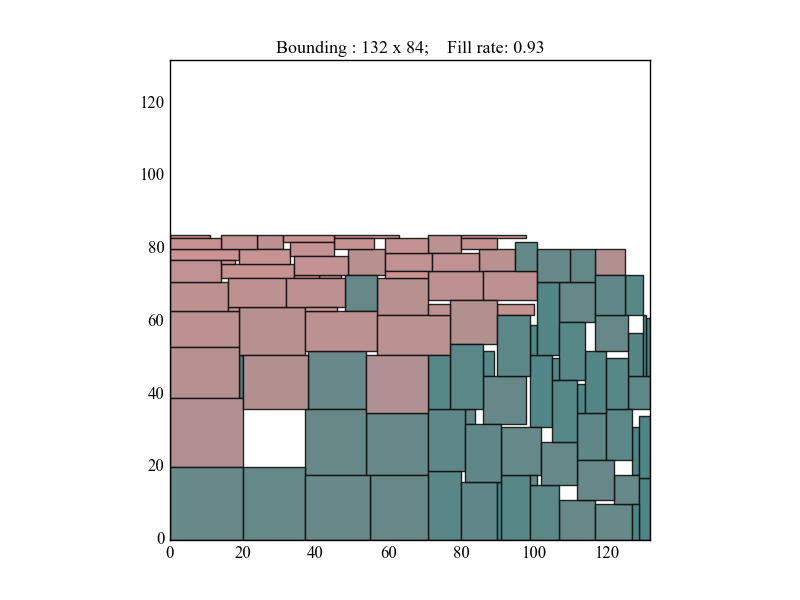

In [6]:
s.sort()
s.greedy_solve()
Image(s.figure_state)

The rectangle objects can be accessed for inspection, such that their state data (e.g. coordinates) transformed for other purposes. Note the order of `s.rects` is identical with the order of the inputs.

In [7]:
[(rect.x1, rect.y1, rect.x2, rect.y2) for rect in s.rects][:5]

[(19, 39, 20, 51),
 (117, 73, 125, 80),
 (107, 0, 117, 11),
 (90, 62, 100, 65),
 (71, 66, 86, 74)]

# Further explorations

Solutions without pre-sorting can also be experimented, e.g. with input shuffled. Unsorted version is not expected to be better.

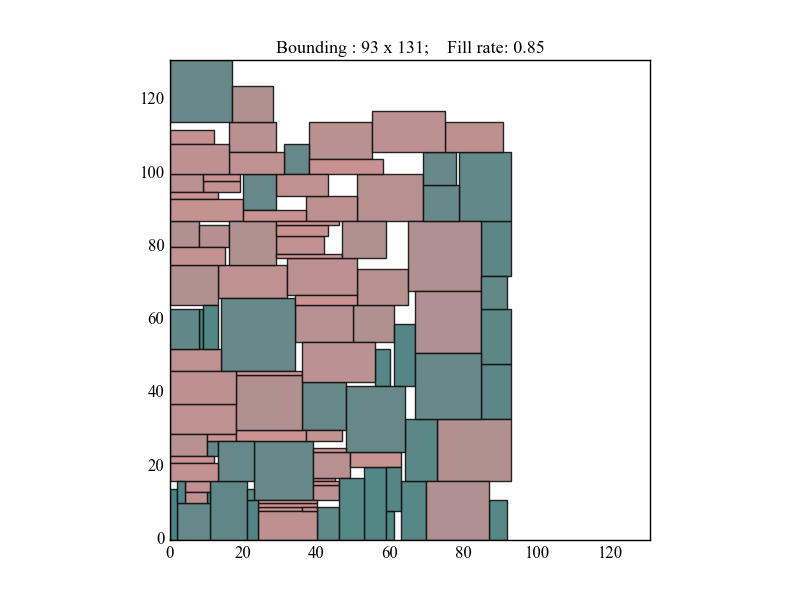

In [8]:
s = SceneDataModel()
s.read_input(inp)
s.shuffle()
s.greedy_solve()
Image(s.figure_state)

Potentially, pre-sorting with other criterions like the `width` or the `height` of rectangles may yield no-worse results. 

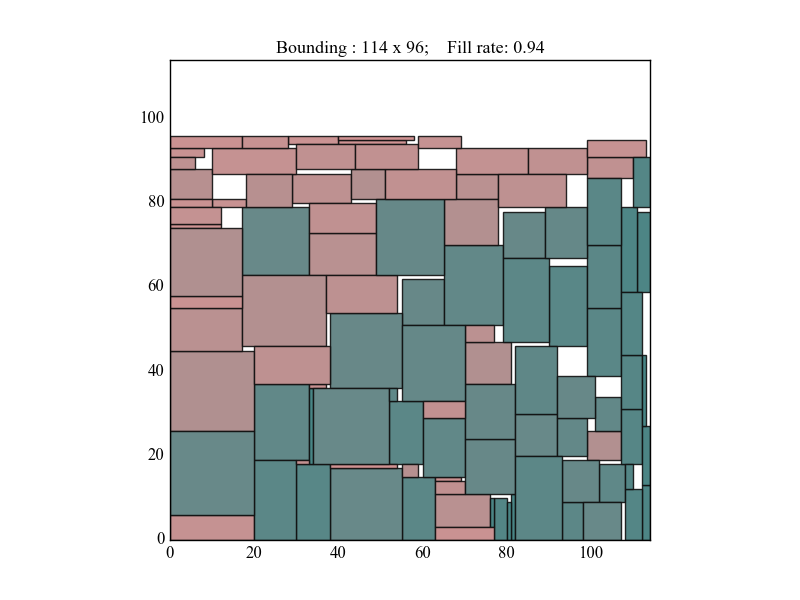

In [9]:
s = SceneDataModel()
s.read_input(inp)
s.sort('width')
s.greedy_solve()
Image(s.figure_state)

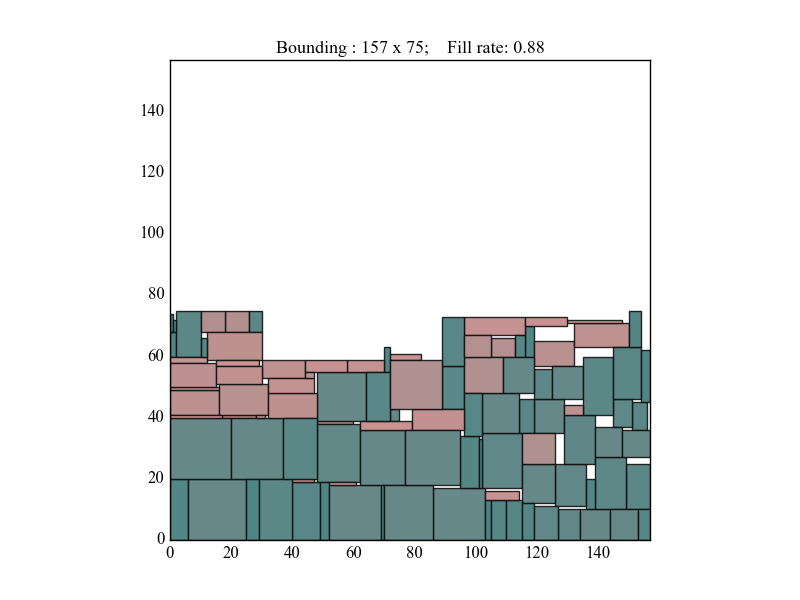

In [10]:
s = SceneDataModel()
s.read_input(inp)
s.sort('height')
s.greedy_solve()
Image(s.figure_state)